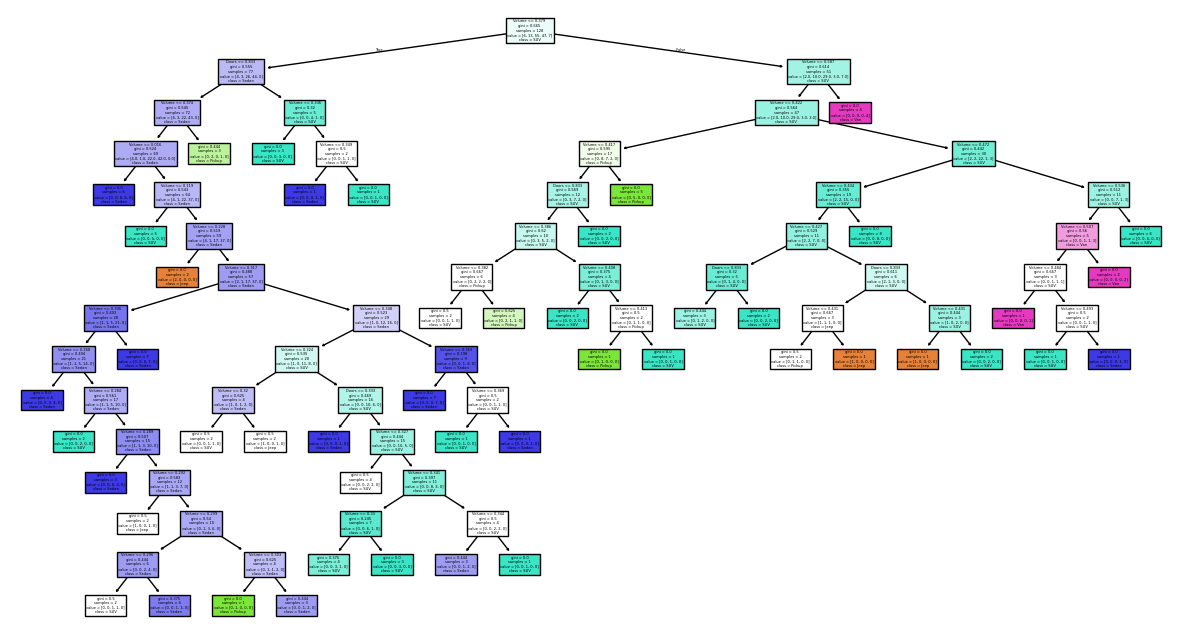

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler

# Load and Normalize data
df = pd.read_csv('AllCars.csv')
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Volume', 'Doors']])
y = df['Style']

# Step 1: Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 2: Build the Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Step 3: Predict testing set and save Tree image
y_pred = tree.predict(X_test)
plt.figure(figsize=(15,8))
plot_tree(tree, feature_names=['Volume', 'Doors'], class_names=tree.classes_, filled=True)
plt.savefig('TreeCars.png')

# Step 4: Create TreeCars.csv with accuracy row at bottom
# We use inverse_transform to show original values in the final CSV
results = pd.DataFrame(scaler.inverse_transform(X_test), columns=['Volume', 'Doors'])
results['Style'] = y_test.values
results['PredictedStyle'] = y_pred

accuracy = (y_pred == y_test.values).mean()
results.to_csv('TreeCars.csv', index=False)
with open('TreeCars.csv', 'a') as f:
    f.write(f"\nAccuracy,,,,{accuracy:.4f}")